In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb


In [2]:
dataset = pd.read_csv("Uber Request Data.csv")
dataset.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


Here we see that 'Drop timestamp' is having some values missing.  

In [4]:
dataset["Pickup point"].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [5]:
dataset.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

Here we see that more than half of the rides were either 'Cancelled' or the cars were not available at that time ('No Cars Available'). This seems to be the reason for the missing values of 'Drop timestamp' we have in our dataset.  

Now we cannot use the feature 'Request timestamp' as such. We have to make new and meaning full features out of this feature.
For that we will create new columns in the dataset which will better explain the 'Request timestamp' feature.

In [6]:
def formatTime(q):
    return q.replace('/','-')

def getDate(a):
    b = a.split()
    return b[0]

def getTime(a):
    b = a.split()
    return b[1]

def splitTime(time):
    if time >= '00:00:00' and time < '04:00:00':
        return 'Late Night'
    elif time >= '04:00:00' and time < '07:00:00':
        return 'Early Morning'
    elif time >= '07:00:00' and time < '12:00:00':
        return 'Morning'
    elif time >= '12:00:00' and time < '16:00:00':
        return 'Afternoon'
    elif time >= '16:00:00' and time < '20:00:00':
        return 'Evening'
    else:
        return 'Night'

In [7]:
dataset['Request timestamp'] = dataset['Request timestamp'].apply(formatTime)
dataset['Date'] = dataset['Request timestamp'].apply(getDate)
dataset['Time'] = dataset['Request timestamp'].apply(getTime)
dataset['TimeCat'] = dataset.Time.apply(splitTime)

In [8]:
dataset.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Date,Time,TimeCat
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11/7/2016 13:00,11-7-2016,11:51,Morning
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11/7/2016 18:47,11-7-2016,17:57,Evening
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12/7/2016 9:58,12-7-2016,9:17,Night
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12/7/2016 22:03,12-7-2016,21:08,Night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,13-07-2016,08:33:16,Morning


# Univariate Analysis

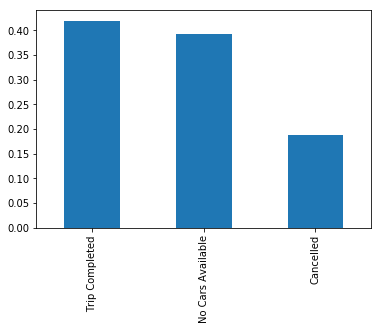

In [9]:
dataset.Status.value_counts(normalize = True).plot.bar()

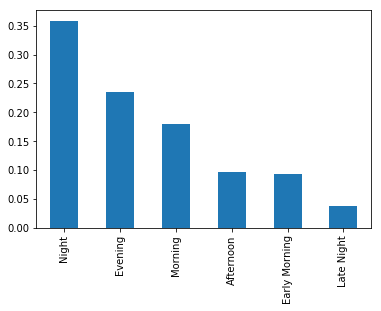

In [10]:
dataset.TimeCat.value_counts(normalize = True).plot.bar()

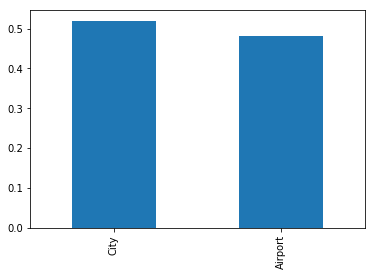

In [11]:
dataset['Pickup point'].value_counts(normalize = True).plot.bar()

# Bivariate Analysis

In [12]:
dataset.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Date,Time,TimeCat
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11/7/2016 13:00,11-7-2016,11:51,Morning


In [13]:
Pickup_Point_Status = pd.crosstab(dataset['Pickup point'],dataset.Status)

In [14]:
Pickup_Point_Status

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


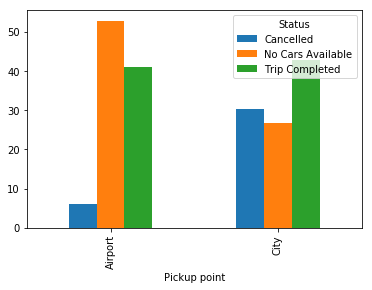

In [15]:
(Pickup_Point_Status.div(Pickup_Point_Status.sum(1),axis=0)*100).plot(kind = 'bar')

In [17]:
Pickup_Point_Status.div(Pickup_Point_Status.sum(1),axis=0)*100

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,6.114886,52.903027,40.982088
City,30.396350,26.717993,42.885657


In [18]:
TimeCat_Status = pd.crosstab(dataset.TimeCat,dataset.Status)

In [19]:
TimeCat_Status

Status,Cancelled,No Cars Available,Trip Completed
TimeCat,,,
Afternoon,69,182,401
Early Morning,228,148,246
Evening,108,901,580
Late Night,7,151,96
Morning,407,267,533
Night,445,1001,975


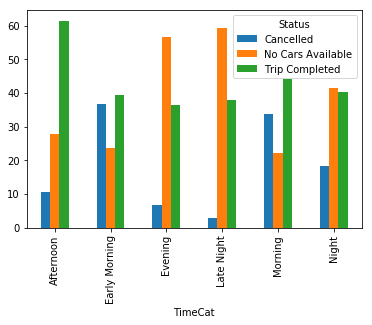

In [20]:
(TimeCat_Status.div(TimeCat_Status.sum(1),axis=0)*100).plot.bar()

# Multivariate Analysis

In [21]:
dataset.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Date,Time,TimeCat
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11/7/2016 13:00,11-7-2016,11:51,Morning


In [22]:
analysisVariable = pd.crosstab([dataset['Pickup point'],dataset.TimeCat],dataset.Status)

In [23]:
analysisVariable

Status                      Cancelled  No Cars Available  Trip Completed
Pickup point TimeCat                                                    
Airport      Afternoon             36                 55             188
             Early Morning          4                 23             106
             Evening               63                813             280
             Late Night             0                 74              45
             Morning               22                 37             227
             Night                 73                711             481
City         Afternoon             33                127             213
             Early Morning        224                125             140
             Evening               45                 88             300
             Late Night             7                 77              51
             Morning              385                230             306
             Night                372                290             494

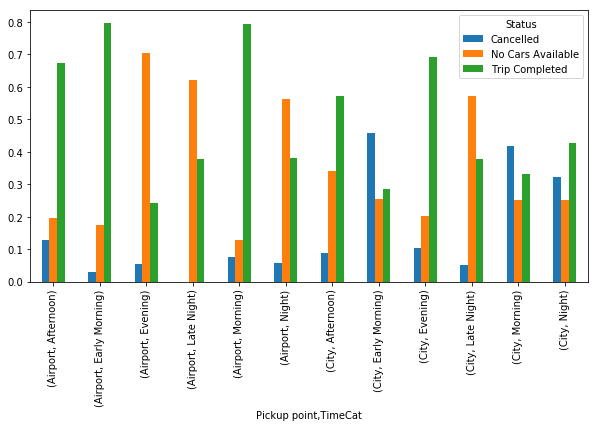

In [24]:
(analysisVariable.div(analysisVariable.sum(1),axis=0)).plot.bar(figsize=[10,5])